# The Elbow Method

In [1]:
# Reload the notebook if an external file is updated
%load_ext autoreload
%autoreload 2

import os
import sys

from pathlib import Path

path = (
    Path
    .cwd()
    .parent
    .parent
    .joinpath('warbler')
    .as_posix()
)

os.chdir(path)
sys.path.append(path)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
import pandas as pd
import scienceplots

from constant import TUNING
from datatype.dataset import Dataset
from datatype.scorer import (
    CalinskiHarabaszScore,
    DaviesBouldinIndex,
    PartitionCoefficient,
    PartitionEntropyCoefficient,
    Scorer,
    SilhouetteScore,
    Strategy,
    SumOfSquaredErrors,
    XieBeniIndex
)
from fcmeans import FCM
from joblib import delayed, Parallel
from matplotlib.ticker import MaxNLocator
from sklearn.utils import resample
from tqdm import tqdm
from typing_extensions import Any

In [ ]:
plt.style.use('science')

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
csv = TUNING.joinpath('search.csv')
dataframe = pd.read_csv(csv)

dataframe = dataframe.sort_values(
    ascending=True, 
    by=['id']
)

In [5]:
dataframe.head(5)

,id,parameter,calinski_harabasz_score,davies_bouldin_index,partition_coefficient,partition_entropy_coefficient,silhouette_score,sum_of_squared_errors,xie_beni_index
0,1,"{'m': 1.1, 'max_iter': 100, 'n_clusters': 3, 'random_state': 42}",12773.289225,0.810163,0.323898,0.022378,0.425943,206323.951821,0.179762
1,2,"{'m': 1.1, 'max_iter': 100, 'n_clusters': 4, 'random_state': 42}",14838.804017,0.790335,0.242888,0.017184,0.426971,138480.033672,0.194018
2,3,"{'m': 1.1, 'max_iter': 100, 'n_clusters': 5, 'random_state': 42}",15999.112643,0.778250,0.193764,0.015096,0.424254,103352.044937,0.180846
3,4,"{'m': 1.1, 'max_iter': 100, 'n_clusters': 6, 'random_state': 42}",15863.093144,0.788184,0.161091,0.013719,0.417381,86205.707235,0.207527
4,5,"{'m': 1.1, 'max_iter': 100, 'n_clusters': 7, 'random_state': 42}",16006.610286,0.785898,0.138040,0.011921,0.402770,72956.006191,0.191691


In [6]:
metrics = [
    CalinskiHarabaszScore, 
    DaviesBouldinIndex,
    PartitionCoefficient,
    PartitionEntropyCoefficient,
    SilhouetteScore,
    SumOfSquaredErrors,
    XieBeniIndex
]

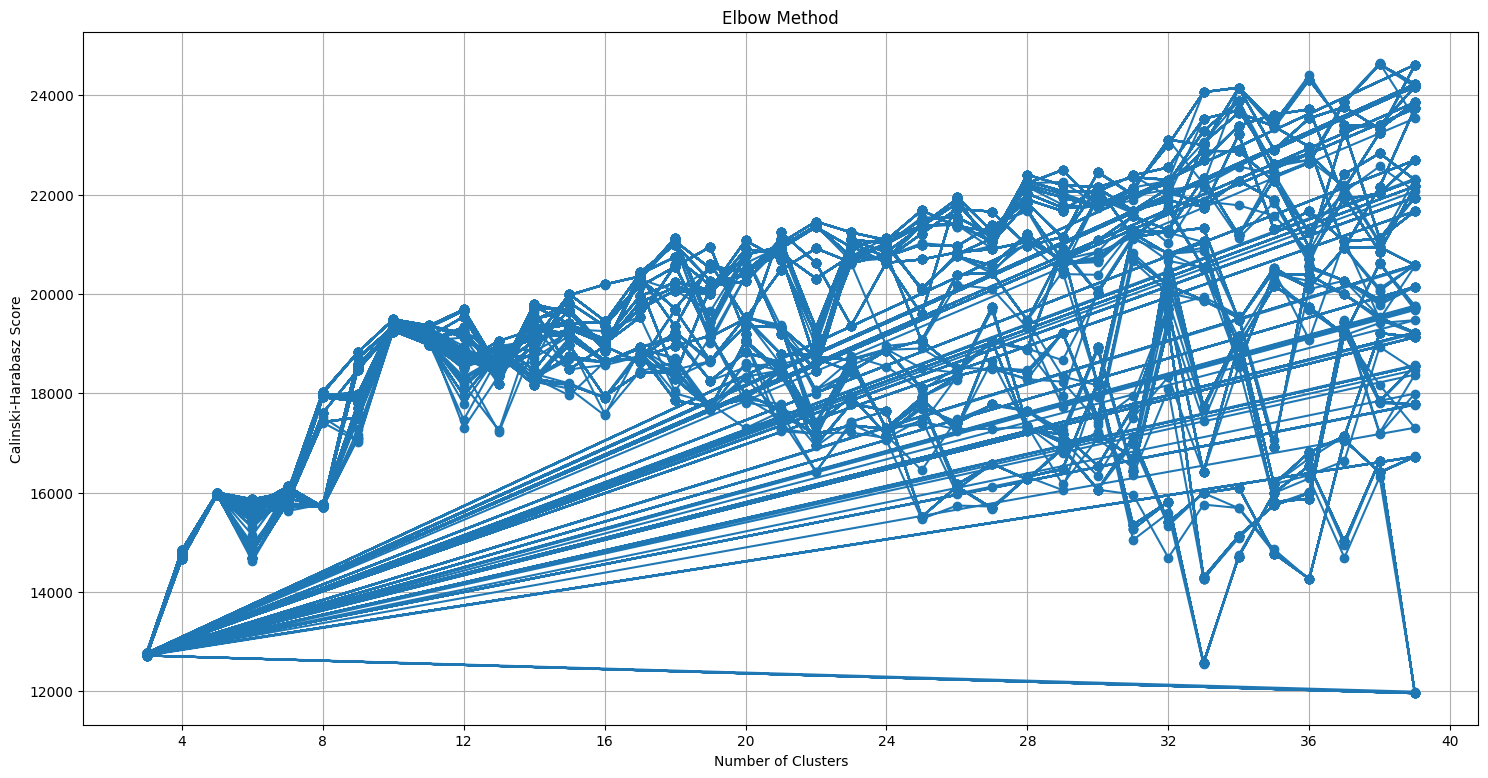

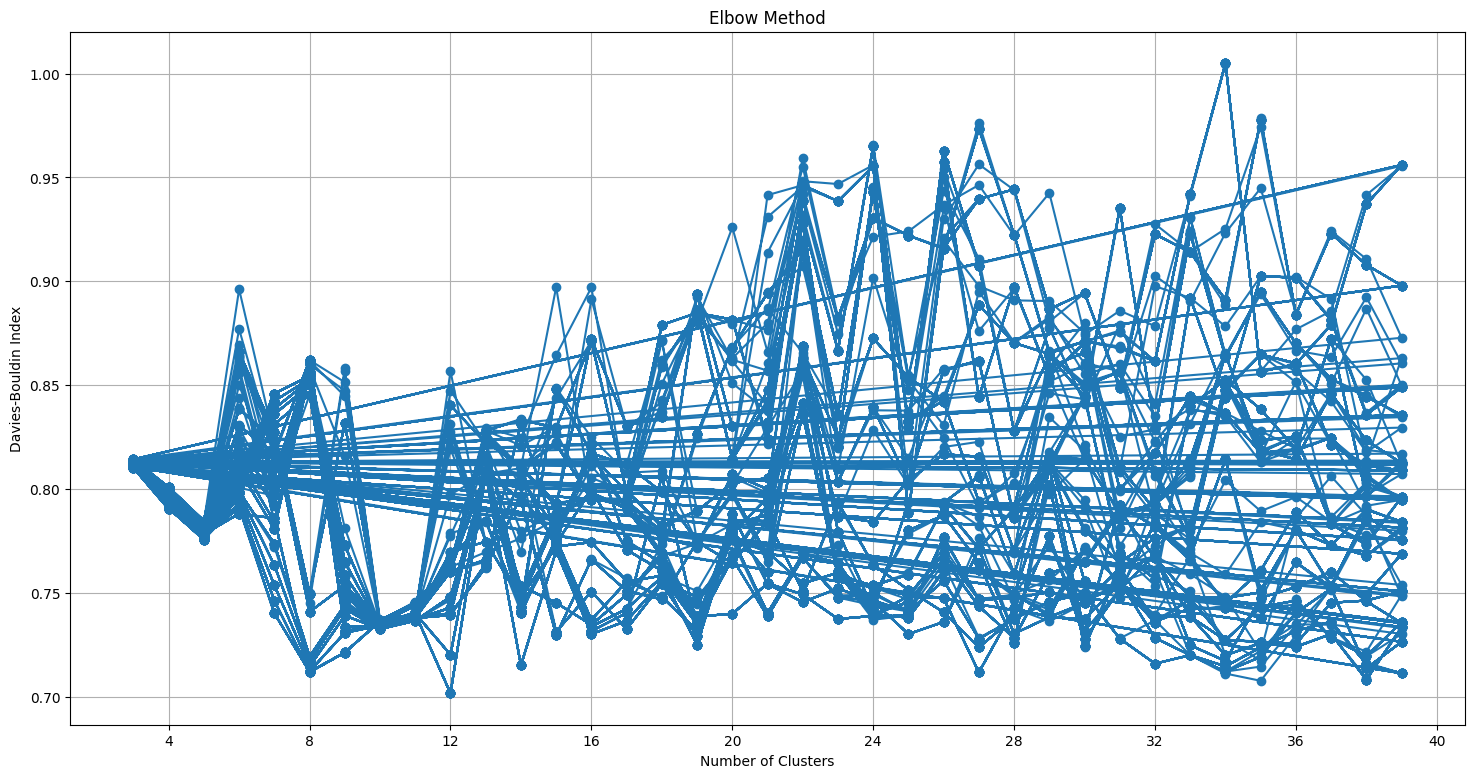

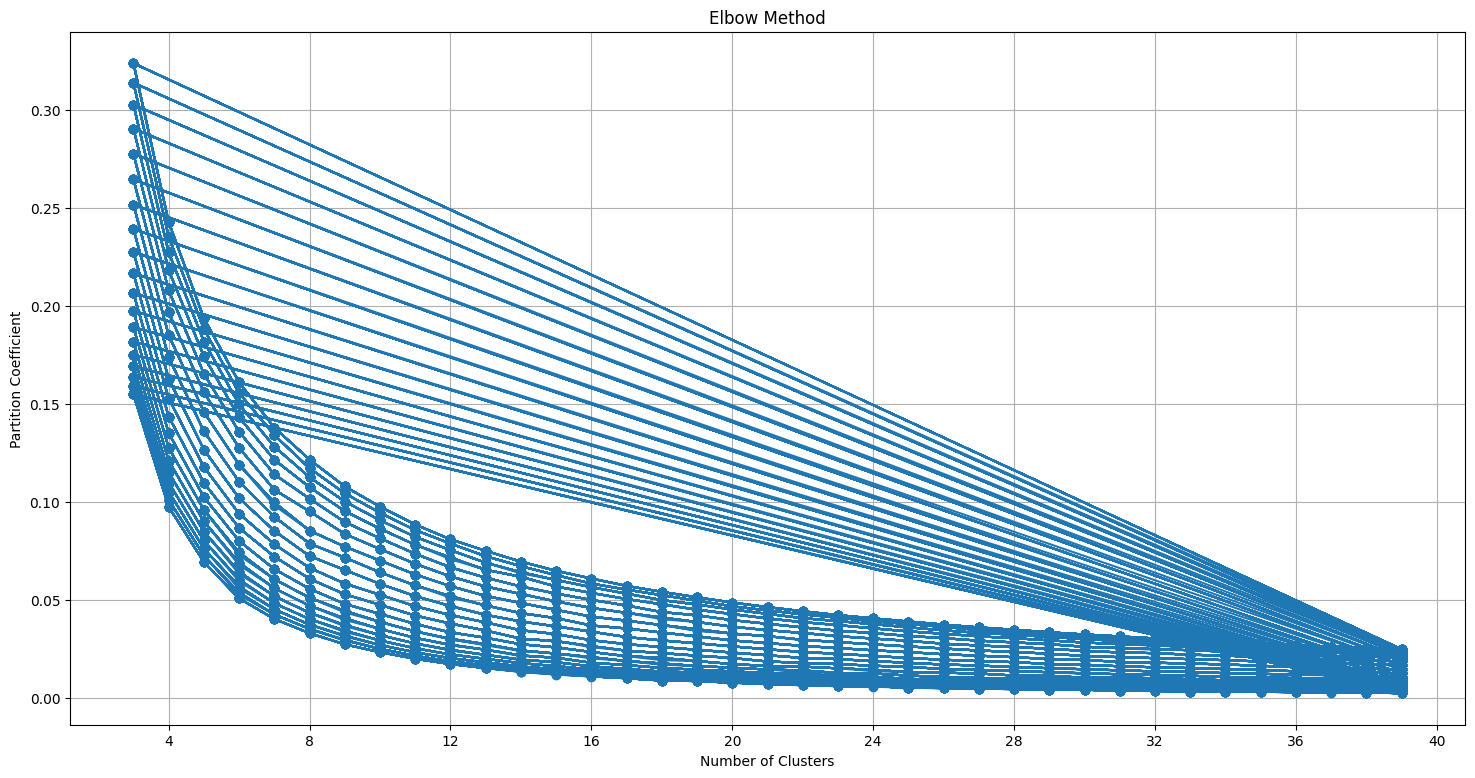

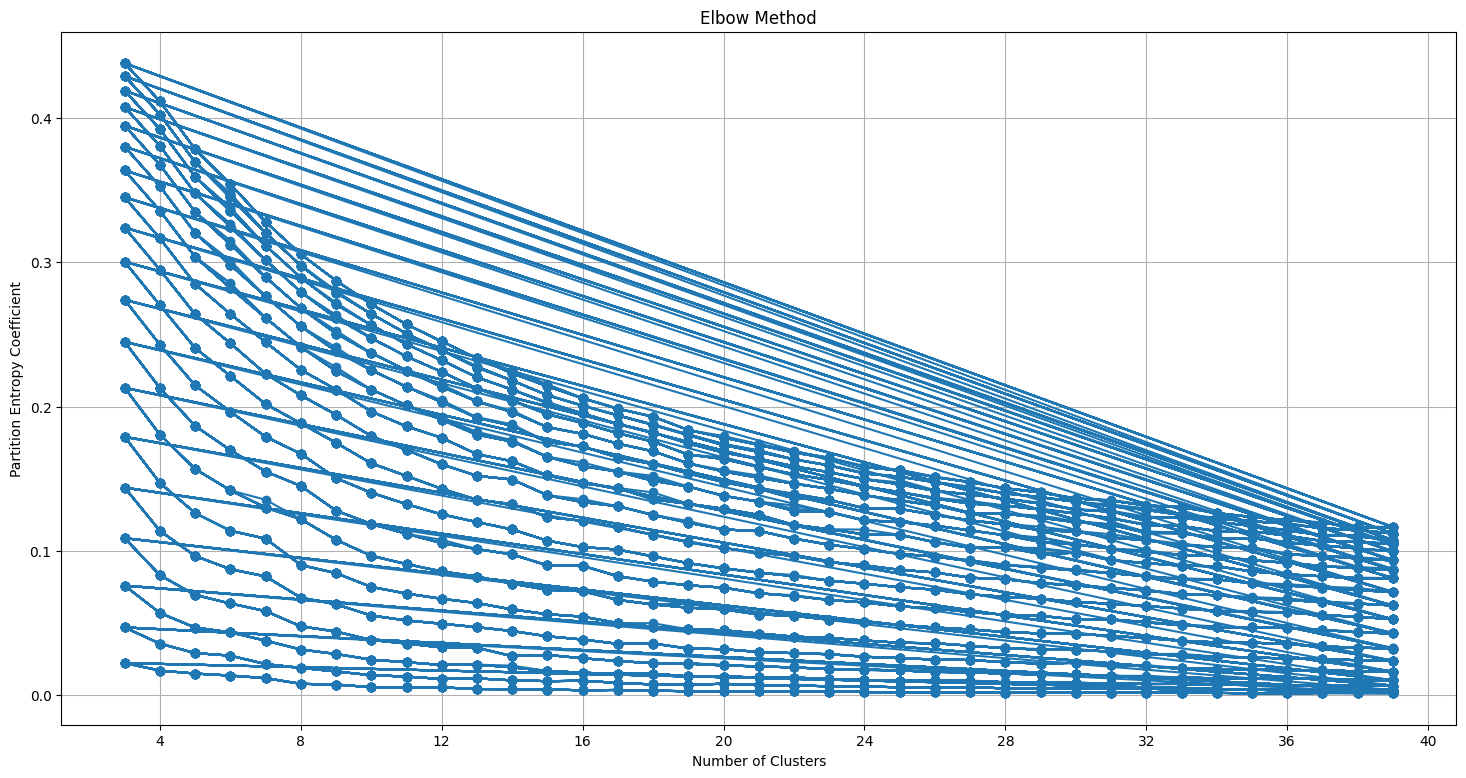

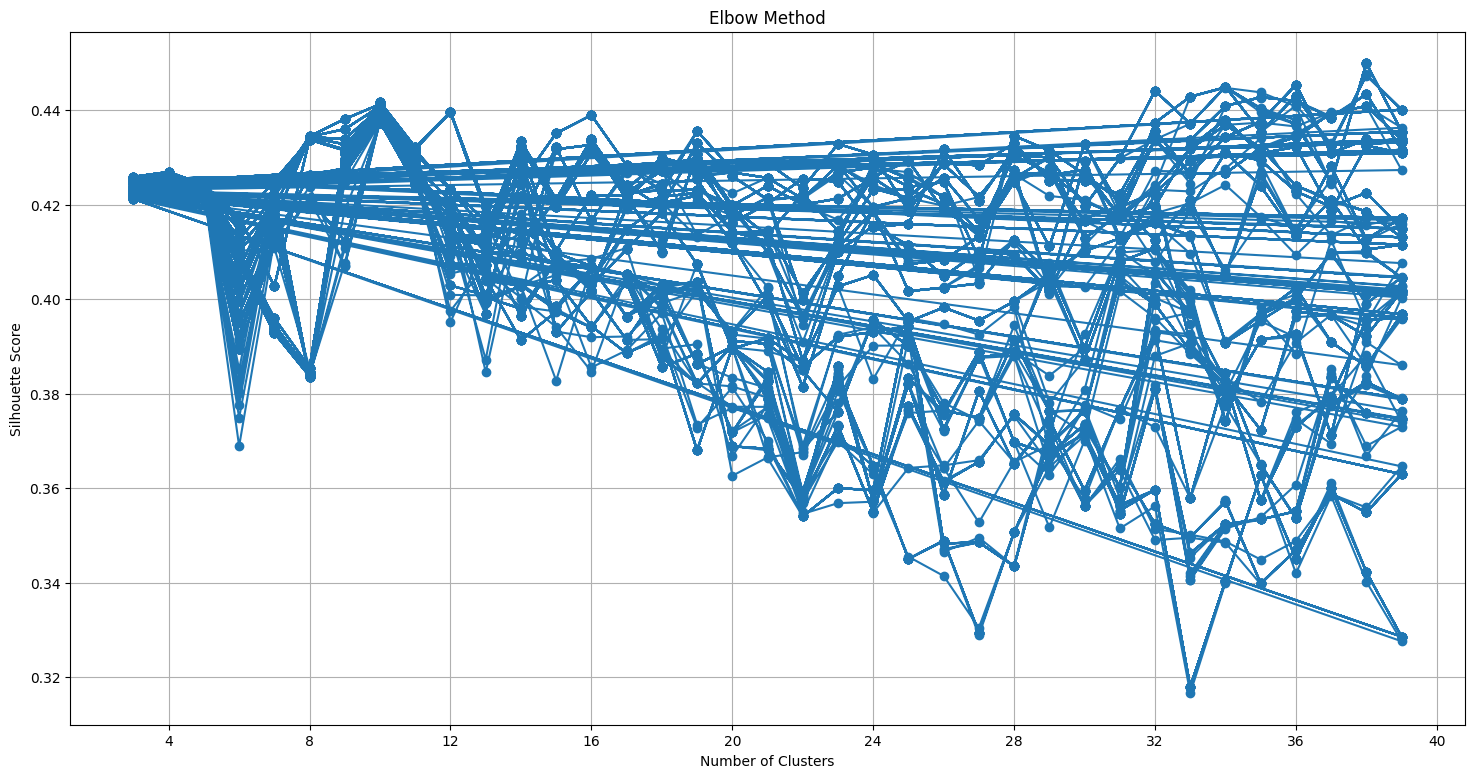

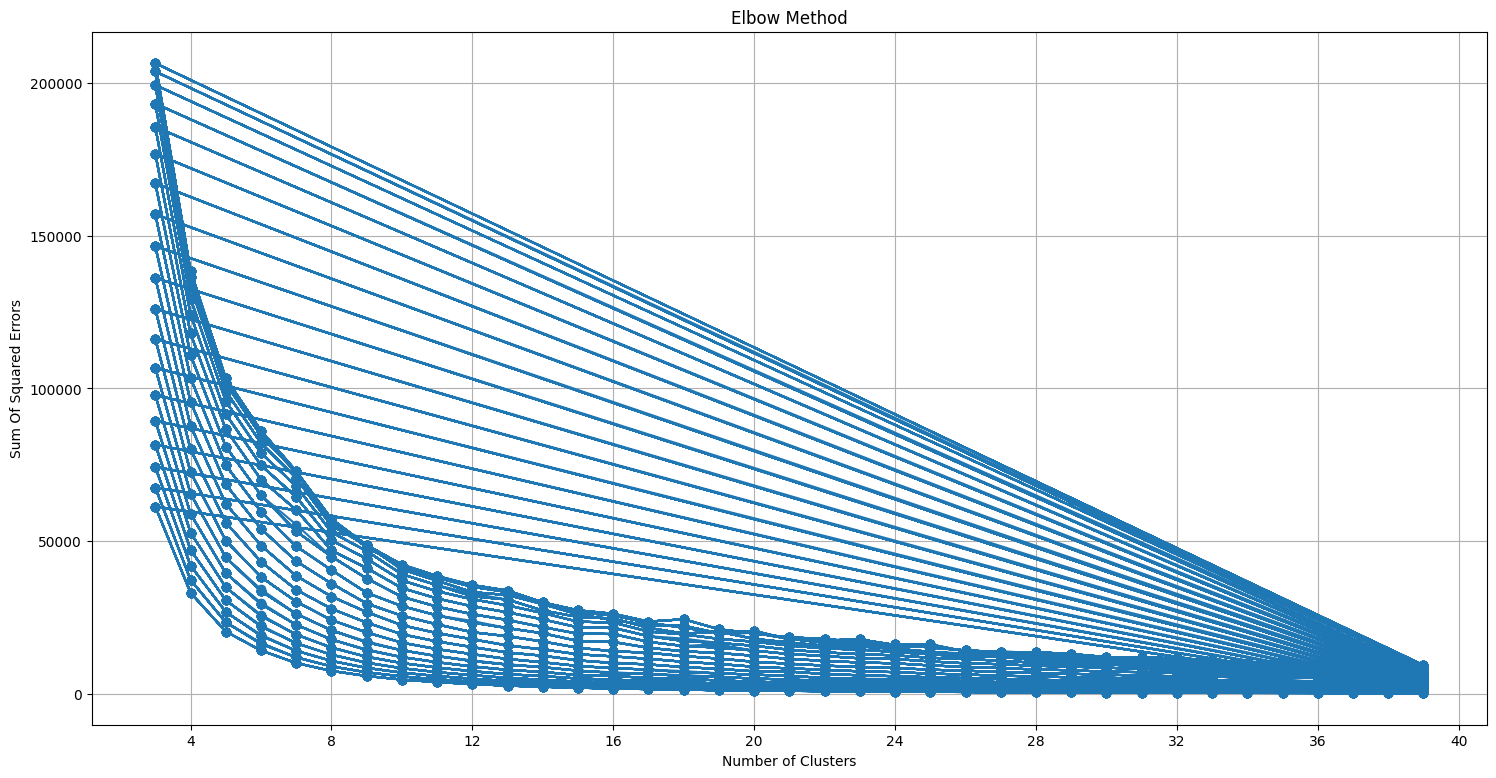

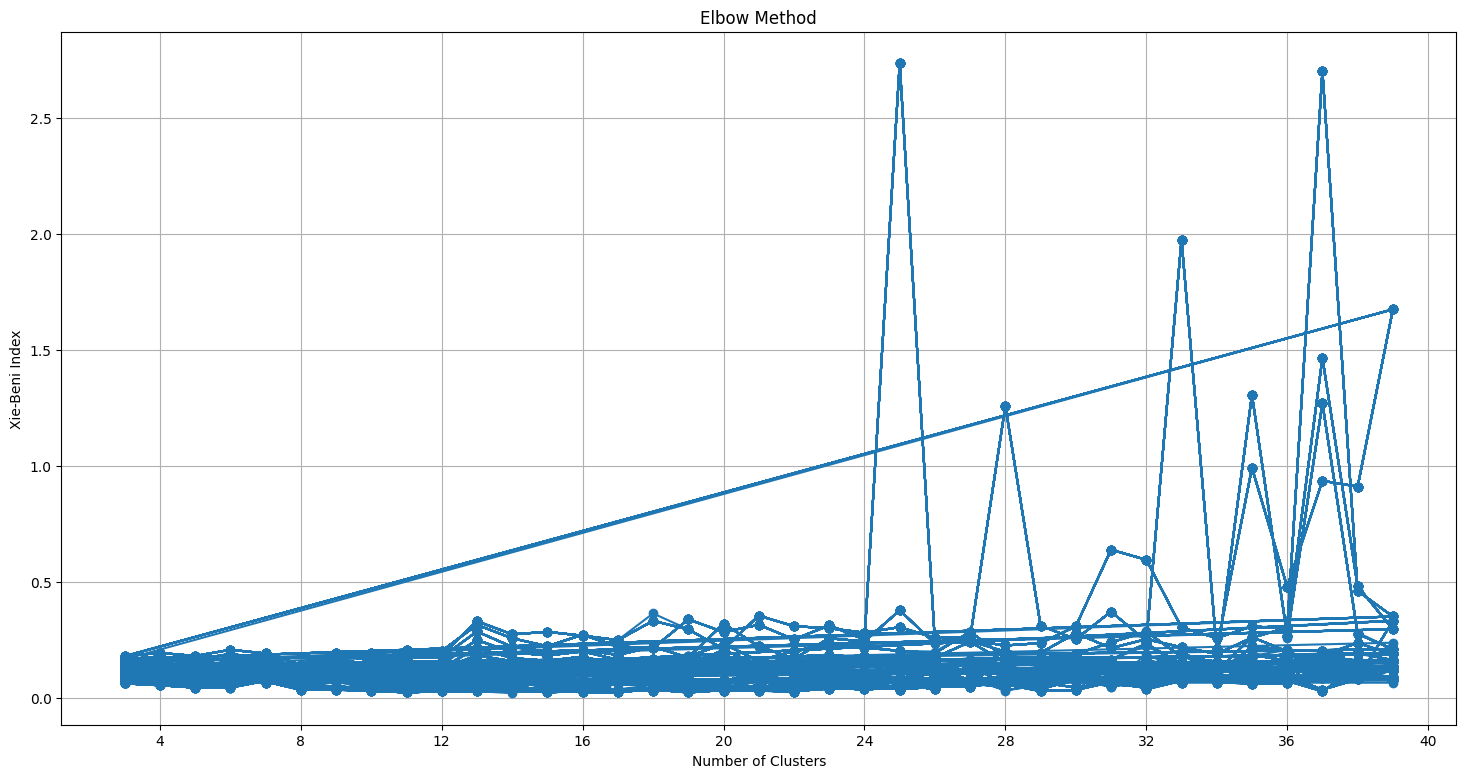

In [7]:
for metric in metrics:
    name = repr(metric)
    ylabel = str(metric)
    
    f = lambda x: ast.literal_eval(x).get('n_clusters')
    n_cluster = dataframe.parameter.apply(f).tolist()
    score = dataframe[name].tolist()

    figsize = (18, 9)
    plt.figure(figsize=figsize)
    
    plt.plot(n_cluster, score, marker='o')
    
    plt.xlabel('Number of Clusters')
    plt.ylabel(ylabel)
    
    ax = plt.gca()
    
    locator = ticker.MaxNLocator(integer=True)
    ax.xaxis.set_major_locator(locator)
    
    plt.title('Elbow Method')
    
    plt.grid(True)

    filename = f"elbow_{name}.png"
    path = TUNING.joinpath(filename)
    
    plt.savefig(
        path,
        bbox_inches='tight',
        dpi=300,
        format='png'
    )
    
    plt.show()
    plt.close()